In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [7]:
p = Path().cwd()
q = p/"drive/MyDrive/Brands"  # used p to create a path to the data
target_dict = {"Fake": 1, "Original": 0}  # creating dictionary mapping to data labels to integer labels
images = []  # create an empty list
labels = []  # create an empty list

for fldr in q.iterdir():
    current_label = fldr.name  # get the name of the current label
    print(current_label)
    for subfldr1 in fldr.iterdir():
        current_sublabel1 = subfldr1.name  # get the name of the current sublabel (transportation, food and beverages, electronics and fashion)
        print(current_sublabel1)
        for subfldr2 in subfldr1.iterdir():
            current_sublabel2 = subfldr2.name  # get the name of the current sublabel (fake, original)
            print(current_sublabel2)
            for img in subfldr2.iterdir():
                if img.is_file():  # check if the current item is a file
                    img = load_img(img, color_mode="grayscale")  # load image as grayscale
                    img_array = img_to_array(img)  # convert the image to a NumPy array
                    img_array_resized = smart_resize(img_array, (256, 256))  # resize the image to 256 by 256
                    images.append(img_array_resized)  # add resized image to list of images
                    labels.append(target_dict[current_sublabel2])  # add label for this image to the list of labels

Electronics
Apple
Original
Fake
MSI
Original
Fake
Nikon
Fake
Original
Lenevo
Fake
Original
HP
Original
Fake
Huawei
Original
Fake
Oppo
Fake
Original
LG
Original
Fake
Acer
Fake
Original
Motorola
Original
Fake
Sharp
Original
Fake
Samsung
Original
Fake
Philips
Original
Fake
JBL
Original
Fake
Dell
Original
Fake
Toshiba
Original
Fake
Panasonic
Fake
Original
Food and Beverages
Starbucks
Fake
Original
Horlicks
Original
Fake
Bru
Original
Fake
Burger King
Fake
Original
Wendy_s
Fake
Original
Cocacola
Fake
Original


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Snickers
Fake
Original
Lays
Original
Fake
Pepsi
Original
Fake
Colgate
Fake
Original
Corona
Original
Fake
Brittania
Original
Fake
Canadadry
Original
Fake
Pizzahut
Original
Fake
7-Up
Fake
Original
Fanta
Original
Fake
Mentos
Original
Fake
Cadbury
Original
Fake
Redbull
Fake
Original
Heineken
Fake
Original
Milkybar
Original
Fake
KFC
Original
Fake
TimHortons
Original
Fake
Tang
Fake
Original
McDonald_s
Original
Fake
Mirinda
Fake
Original
Carlsberg
Fake
Original
Kitkat
Original
Fake
Subway
Original
Fake
Applebees
Original
Fake
Aquafina
Original
Fake
Monster
Original
Fake
Maggi
Original
Fake
Mars
Fake
Original
Besleri
Fake
Original
Fashion
Balenciaga
Original
Fake
Ralph Lauren
Original
Fake
Versace
Original
Fake
Burberry
Fake
Original
Victoria_s secret
Original
Fake
Dolce and Gabbana
Original
Fake
Reebok
Fake
Original
Puma
Original
Fake
TommyHilfiger
Fake
Original
Johnson _ Johnson
Fake
Original
Adidas
Original
Fake
Tupperware
Fake
Original
American Eagle
Original
Fake
Vans
Fake
Original
Zara
O

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
len(images)

12137

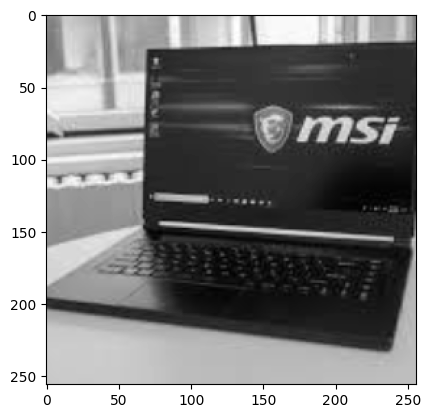

In [10]:
plt.imshow(images[180], cmap='gray')

In [11]:
target_dict

{'Fake': 1, 'Original': 0}

In [13]:
print(labels[180])

0
